In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.vision.all import *
from PIL import Image

In [3]:
train = pd.read_csv('/kaggle/input/stanford-car-dataset-by-classes-folder/anno_train.csv')
test  = pd.read_csv('/kaggle/input/stanford-car-dataset-by-classes-folder/anno_test.csv')
names = pd.read_csv('/kaggle/input/stanford-car-dataset-by-classes-folder/names.csv')

In [4]:
names.head()

,AM General Hummer SUV 2000
0,Acura RL Sedan 2012
1,Acura TL Sedan 2012
2,Acura TL Type-S 2008
3,Acura TSX Sedan 2012
4,Acura Integra Type R 2001


In [5]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=2),
    item_tfms=Resize(224))

In [6]:
cars_dls = cars.dataloaders(source='/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train')

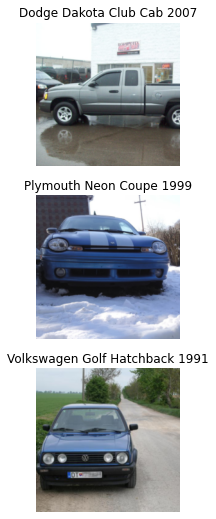

In [7]:
cars_dls.show_batch(max_n=3, nrows=3)

In [20]:
learn = vision_learner(cars_dls, resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [21]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,6.492020,4.751949,0.921990,0.078010,02:37
1,4.666170,3.275273,0.730344,0.269656,02:37
2,3.174856,2.451004,0.581695,0.418305,02:39
3,2.226277,2.008582,0.488329,0.511671,02:39
4,1.636715,1.802915,0.446560,0.553440,02:39
5,1.195888,1.644453,0.417076,0.582924,02:38
6,0.923085,1.515284,0.399877,0.600123,02:36
7,0.729838,1.463373,0.374693,0.625307,02:37
8,0.608901,1.442242,0.374079,0.625921,02:35
9,0.555050,1.440939,0.371622,0.628378,02:35


In [22]:
learn.export('model_62.pkl')